In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd
import pylab
from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
import cv2
from scipy import ndimage
from PIL import Image
import imageio
# loading libraries or packages
import os
print('Get current working directory : ', os.getcwd())

Get current working directory :  /Users/gorkem.er/Desktop/EyeTrack_GenderRace


In [20]:
path = os.getcwd()#'/Users/gorkem.er/Desktop/DynamicFaceAveraging/'
# loading data frames, E3
df_fix = pd.read_csv(path + '/list_of_fixations.csv')
df_sac = pd.read_csv(path + '/list_of_saccades.csv')
df_variables = pd.read_csv(path + '/list_of_variables.csv')
number_of_subs = df_fix["subID"].unique()
#  11 participants
stim_imgs_data = df_variables[df_variables['variable'] == 'stimImgs']
unique_stim_imgs_values = stim_imgs_data['value'].unique()
len(unique_stim_imgs_values)
# 364 unique images 



364

In [21]:
# beginning of the analysis #
# Jan 11, 2024
#
# merged_df is my df

merged_df = pd.read_csv(path + '/merged_dataframe.csv')
merged_df.head()
# we have same images being shown two times. ok. but I also need to adjust the coordinates. 


,Unnamed: 0,Unnamed: 0.1,trial,sttime,entime,sttime_rel,entime_rel,hstx,hsty,gstx,...,landmark_58_landmark_y,landmark_59_landmark_y,landmark_60_landmark_y,landmark_61_landmark_y,landmark_62_landmark_y,landmark_63_landmark_y,landmark_64_landmark_y,landmark_65_landmark_y,landmark_66_landmark_y,landmark_67_landmark_y
0,0,1,1,29962564,29963106,48,590.0,32,494,966.500000,...,311,307,293,289,289,289,292,291,292,292
1,1,2,1,29963128,29963407,612,891.0,-8,179,957.700012,...,311,307,293,289,289,289,292,291,292,292
2,2,3,1,29963414,29963875,898,1359.0,-31,204,952.599976,...,311,307,293,289,289,289,292,291,292,292
3,3,4,1,29963900,29964124,1384,1608.0,192,600,1001.299988,...,311,307,293,289,289,289,292,291,292,292
4,4,5,1,29964177,29964483,1661,1967.0,-1020,3215,736.900024,...,311,307,293,289,289,289,292,291,292,292


In [22]:
# don't skip, run this. 
# Given coordinates in Plane B are:
B_x, B_y = 600/2, 422/2

# Center coordinates of Plane B are:
center_B_x, center_B_y = 300, 211
center_A_x, center_A_y = 960, 540

width_plane_a = 1920
height_plane_a = 1080
width_plane_b = 600
height_plane_b = 422

# Calculate scaling factors
scale_factor_x = width_plane_a / width_plane_b
scale_factor_y = height_plane_a / height_plane_b

# Calculate translated coordinates from Plane B to Plane A. Aradaki farki carpip ekliyosun
A_x = (B_x - center_B_x) * scale_factor_x + center_A_x
A_y = (B_y - center_B_y) * scale_factor_y + center_A_y

print("Equivalent coordinates in Plane A:", A_x, A_y)

# tamam bu calisiyor simdi tup columnlari boyle updatedeleyebilirim check:
# something like this:

# Filter xandy-coordinate columns and update them
#x_columns = [col for col in merged_df.columns if '_landmark_x' in col]
#merged_df.update(merged_df[x_columns].subtract(center_B_x).multiply(scale_factor_x).add(center_A_x))
#merged_df.update(merged_df[y_columns].subtract(center_B_y).multiply(scale_factor_y).add(center_A_y))

x_columns = [col for col in merged_df.columns if '_landmark_x' in col]
merged_df.update(merged_df[x_columns].subtract(center_B_x).multiply(scale_factor_x).add(center_A_x).round())
y_columns = [col for col in merged_df.columns if '_landmark_y' in col]
merged_df.update(merged_df[y_columns].subtract(center_B_y).multiply(scale_factor_y).add(center_A_y).round())


# Update all xandy-coordinate columns to be centered at (960, 540) in Plane A
#landmarks_df.update(landmarks_df.filter(like='_x').multiply(scale_factor_x).add(center_plane_a_x))
#landmarks_df.update(landmarks_df.filter(like='_y').multiply(scale_factor_y).add(center_plane_a_y))

#print(landmarks_df)

Equivalent coordinates in Plane A: 960.0 540.0


In [5]:

merged_df.head()
# now the coordinates should have been normalized. 

,Unnamed: 0,Unnamed: 0.1,trial,sttime,entime,sttime_rel,entime_rel,hstx,hsty,gstx,...,landmark_58_landmark_y,landmark_59_landmark_y,landmark_60_landmark_y,landmark_61_landmark_y,landmark_62_landmark_y,landmark_63_landmark_y,landmark_64_landmark_y,landmark_65_landmark_y,landmark_66_landmark_y,landmark_67_landmark_y
0,0,1,1,29962564,29963106,48,590.0,32,494,966.500000,...,796.0,786.0,750.0,740.0,740.0,740.0,747.0,745.0,747.0,747.0
1,1,2,1,29963128,29963407,612,891.0,-8,179,957.700012,...,796.0,786.0,750.0,740.0,740.0,740.0,747.0,745.0,747.0,747.0
2,2,3,1,29963414,29963875,898,1359.0,-31,204,952.599976,...,796.0,786.0,750.0,740.0,740.0,740.0,747.0,745.0,747.0,747.0
3,3,4,1,29963900,29964124,1384,1608.0,192,600,1001.299988,...,796.0,786.0,750.0,740.0,740.0,740.0,747.0,745.0,747.0,747.0
4,4,5,1,29964177,29964483,1661,1967.0,-1020,3215,736.900024,...,796.0,786.0,750.0,740.0,740.0,740.0,747.0,745.0,747.0,747.0


In [23]:
landmark_ranges = {
    'A': (0, 17),
    'B': (17, 27),
    'C': (27, 36),
    'D': (36, 42),
    'E': (42, 48),
    'F': (48, 64),
}

# Create dictionaries to store separate DataFrames for each label
landmarks_label_dict = {}

for label, (start, end) in landmark_ranges.items():
    # Filter columns for x and y coordinates within the specified range
    x_columns = [f'landmark_{i}_landmark_x' for i in range(start, end)]
    y_columns = [f'landmark_{i}_landmark_y' for i in range(start, end)]

    # Create DataFrames for x and y coordinates
    landmarks_x_df = merged_df[x_columns]
    landmarks_y_df = merged_df[y_columns]

    # Combine x and y DataFrames into one DataFrame for the label
    landmarks_label_df = pd.concat([landmarks_x_df, landmarks_y_df], axis=1)

    # Add the DataFrame to the dictionary
    landmarks_label_dict[label] = landmarks_label_df

# Display the DataFrames for each label
for label, df in landmarks_label_dict.items():
    print(f"\nLandmark Label {label}:\n{df}")


Landmark Label A:
        landmark_0_landmark_x  landmark_1_landmark_x  landmark_2_landmark_x  \
0                       650.0                  656.0                  669.0   
1                       650.0                  656.0                  669.0   
2                       650.0                  656.0                  669.0   
3                       650.0                  656.0                  669.0   
4                       650.0                  656.0                  669.0   
...                       ...                    ...                    ...   
182572                  634.0                  637.0                  646.0   
182573                  634.0                  637.0                  646.0   
182574                  634.0                  637.0                  646.0   
182575                  634.0                  637.0                  646.0   
182576                  634.0                  637.0                  646.0   

        landmark_3_landmark_x  l

In [24]:
merged_df.duration.head()# change as a function of size

0    542
1    279
2    461
3    224
4    306
Name: duration, dtype: int64

No handles with labels found to put in legend.


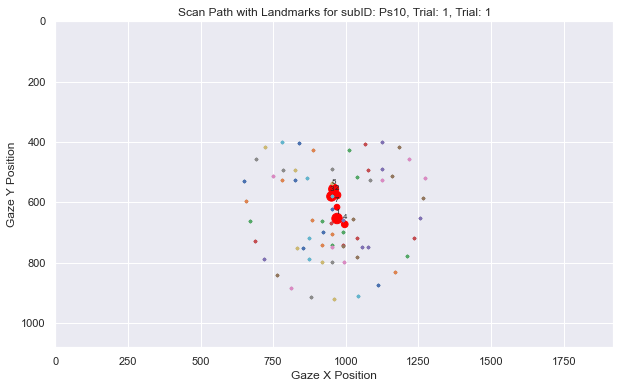

No handles with labels found to put in legend.


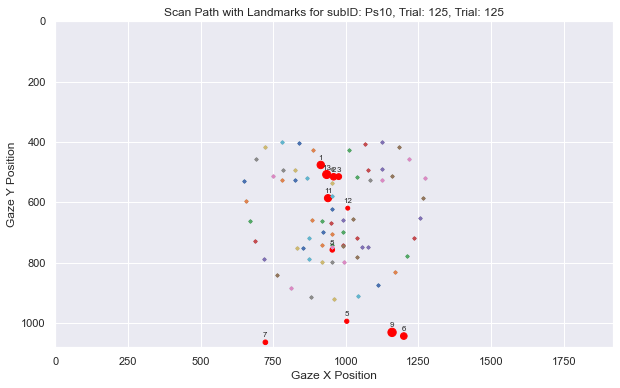

No handles with labels found to put in legend.


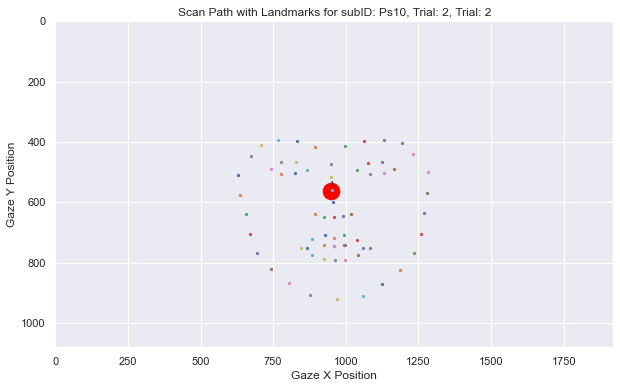

No handles with labels found to put in legend.


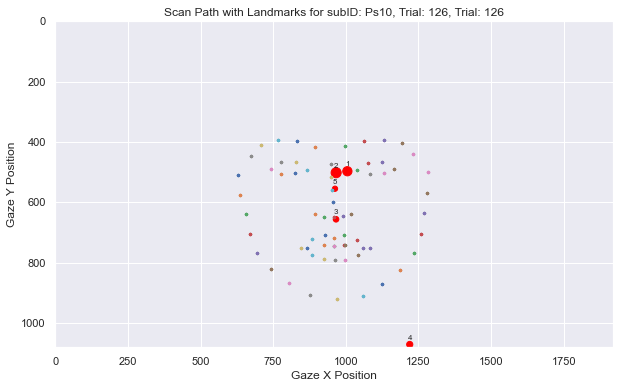

No handles with labels found to put in legend.


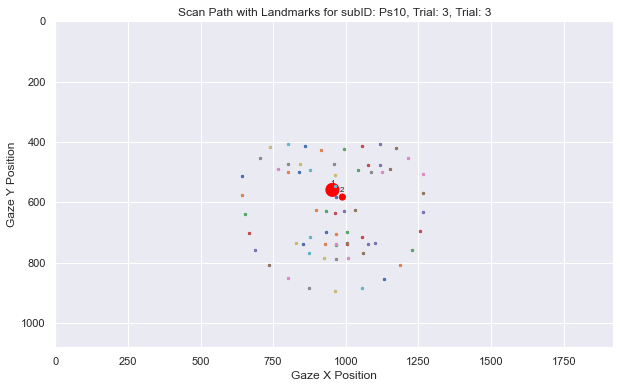

No handles with labels found to put in legend.


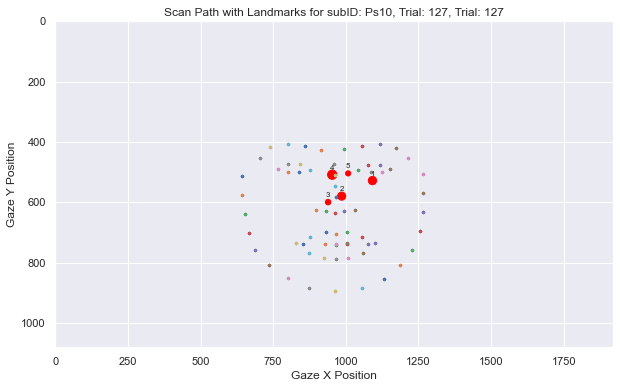

No handles with labels found to put in legend.


KeyboardInterrupt: 

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming merged_df is your DataFrame
# If not, replace merged_df with the actual DataFrame name

# Get unique subIDs
unique_subIDs = merged_df['subID'].unique()

# Loop through each subID
for subID in unique_subIDs:
    sub_data = merged_df[merged_df['subID'] == subID]

    # Loop through each trial for the current subID
    for trial_number in sub_data['trial'].unique():
        trial_data = sub_data[sub_data['trial'] == trial_number]

        # Plot the scan path with inverted y-axis
        plt.figure(figsize=(10, 6))
        #plt.plot(trial_data['gavx'], trial_data['gavy'], marker='o', markersize = trial_data['duration'], linestyle='-', color='r', label='Scan Path')
        plt.scatter(trial_data['gavx'], trial_data['gavy'], s=trial_data['duration'].astype(float) / 5, color = 'red')
        num_landmarks = 67

        for i in range(num_landmarks):
            landmark_x_col = f'landmark_{i}_landmark_x'
            landmark_y_col = f'landmark_{i}_landmark_y'
            plt.scatter(
                trial_data[landmark_x_col], 
                trial_data[landmark_y_col],
                #label=f'Landmark {i}', 
                alpha=1,
                s=5
            )

        # Connect points with lines
        #for i in range(len(trial_data) - 1):
        #    plt.plot([trial_data['gavx'].iloc[i], trial_data['gavx'].iloc[i+1]],
        #             [trial_data['gavy'].iloc[i], trial_data['gavy'].iloc[i+1]],
        #             color='blue', linestyle='-', linewidth=1, alpha=0.5)

        # Annotate each point with trial order
        for i, (x, y) in enumerate(zip(trial_data['gavx'], trial_data['gavy'])):
            plt.annotate(str(i+1), (x, y), textcoords="offset points", xytext=(0,5), ha='center', fontsize=8)

        plt.title(f'Scan Path with Landmarks for subID: {subID}, Trial: {trial_number}, Trial: {trial_number}')
        plt.xlabel('Gaze X Position')
        plt.ylabel('Gaze Y Position')

        # Set axis limits to start from zero
        plt.xlim(left=0, right = 1920)
        plt.ylim(bottom=0, top = 1080)

        plt.gca().invert_yaxis()  # Invert y-axis
        plt.legend()
        plt.show(block=False)  # Make the plot non-blocking
        plt.pause(0.001)  # Add a small delay

        # Wait for a key press to continue to the next trial
        #input("Press Enter to continue to the next trial...")

        # Close the current plot to avoid overlap with the next one
        plt.close()


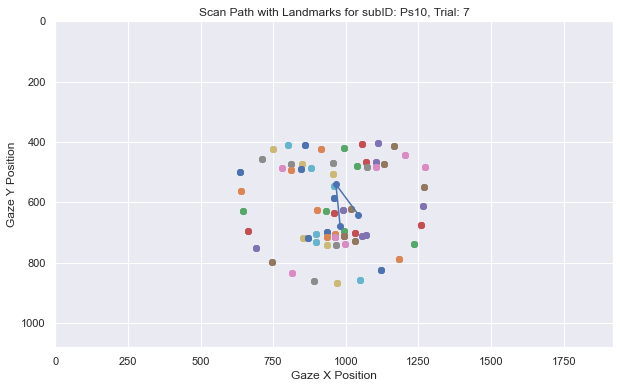

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, replace df with the actual DataFrame name

# Select data for a specific trial and subID
subID = 'Ps10'
trial_number = 7
trial_data = merged_df[(merged_df['subID'] == subID) & (merged_df['trial'] == trial_number)]

# Plot the scan path
plt.figure(figsize=(10, 6))
plt.plot(trial_data['gavx'], trial_data['gavy'], marker='o', linestyle='-', color='b')
# Scatter plot for landmark coordinates with subsampling and reduced marker size
num_landmarks = 67
subsampling_factor = 5  # Adjust as needed

for i in range(num_landmarks):
    landmark_x_col = f'landmark_{i}_landmark_x'
    landmark_y_col = f'landmark_{i}_landmark_y'
    #print(trial_data[landmark_x_col])
    plt.scatter(
        trial_data[landmark_x_col], 
        trial_data[landmark_y_col],  # Invert y-axis
        alpha=1
    )


plt.title(f'Scan Path with Landmarks for subID: {subID}, Trial: {trial_number}')
plt.xlabel('Gaze X Position')
plt.ylabel('Gaze Y Position')
plt.xlim(left=0, right = 1920)
plt.ylim(bottom=0, top = 1080)
plt.gca().invert_yaxis()  # Invert y-axis
#plt.legend()

plt.show()


In [27]:
merged_df['stim_prefix'] = merged_df['stimImgs'].str[4:6]
merged_df['stim_prefix']

0         BM
1         BM
2         BM
3         BM
4         BM
          ..
182572    BF
182573    BF
182574    BF
182575    BF
182576    BF
Name: stim_prefix, Length: 182577, dtype: object

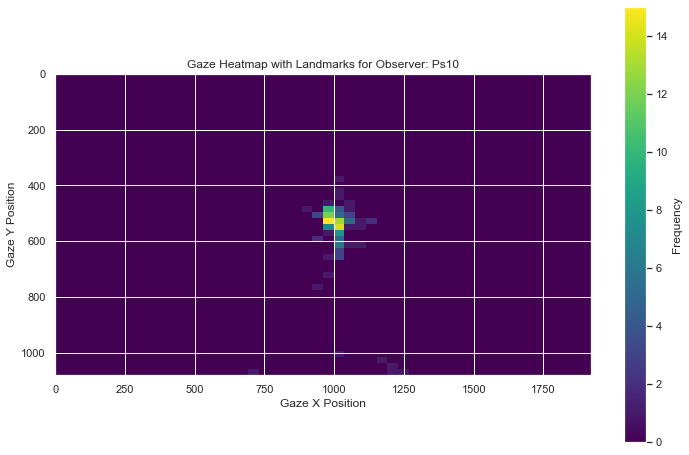

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
# If not, replace df with the actual DataFrame name

# Select data for a specific observer
subID = 'Ps10'
stim_prefixes = merged_df['stim_prefix'].unique()

observer_data = merged_df[(merged_df['subID'] == subID) & (merged_df['stim_prefix'] == "BM") & (merged_df['task_ID'] == "gender")]


# Create a 2D histogram for gaze positions
heatmap, xedges, yedges = np.histogram2d(observer_data['gavx'], observer_data['gavy'], bins=(50, 50), range=[[0, 1920], [0, 1080]])

# Plot the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(heatmap.T, origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]], cmap='viridis')
plt.colorbar(label='Frequency')

# Plot landmarks on top of the heatmap
num_landmarks = 67
exclude_ranges = [(0, 3), (13, 17)]

for i in range(num_landmarks):
    if any(start <= i <= end for start, end in exclude_ranges):
        continue  # Skip this iteration

    landmark_x_col = f'landmark_{i}_landmark_x'
    landmark_y_col = f'landmark_{i}_landmark_y'
    #plt.scatter(observer_data[landmark_x_col], observer_data[landmark_y_col], s=10, c='red', marker='o', alpha=0.5)

plt.title(f'Gaze Heatmap with Landmarks for Observer: {subID}')
plt.xlabel('Gaze X Position')
plt.ylabel('Gaze Y Position')
plt.xlim(left=0, right=1920)
plt.ylim(bottom=0, top=1080)
plt.gca().invert_yaxis()  # Invert y-axis

# Show the plot
plt.show()


/var/folders/0w/4387q1f935q4_mz0ryr8155c0000gp/T/ipykernel_51442/1464539865.py:83: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 0.95])


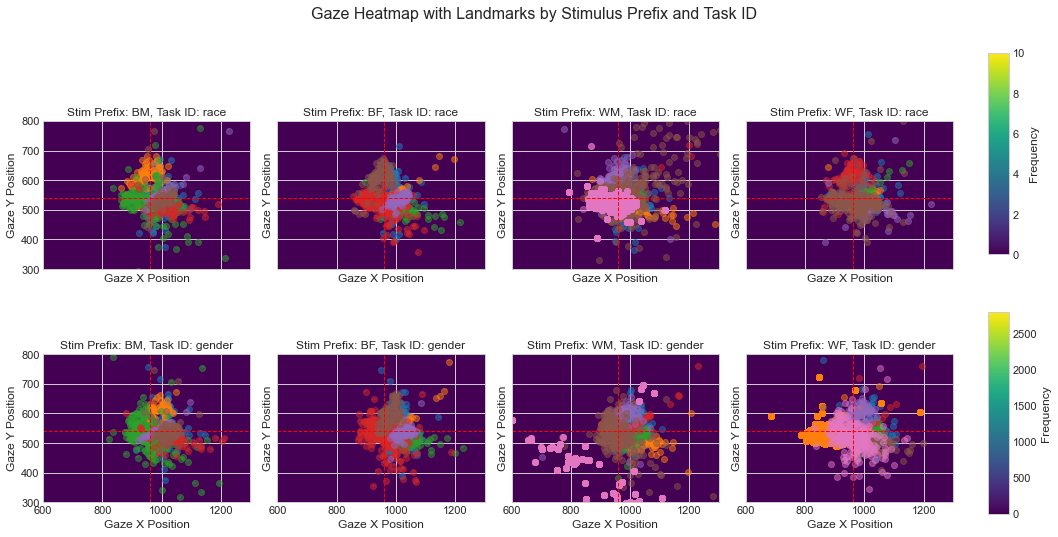

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is your DataFrame
# If not, replace df with the actual DataFrame name

# Create a list of unique stimulus prefixes and task IDs
stim_prefixes = merged_df['stim_prefix'].unique()
task_IDs_level_0 = merged_df[merged_df['stim_prefix'] == stim_prefixes[0]]['task_ID'].unique()
task_IDs_level_1 = merged_df[merged_df['stim_prefix'] == stim_prefixes[0]]['task_ID'].unique()

# Set the style for seaborn
plt.style.use('seaborn-whitegrid')

# Set up the subplots
fig, axes = plt.subplots(nrows=2, ncols=len(stim_prefixes), figsize=(15, 8), sharex=True, sharey=True)
fig.suptitle('Gaze Heatmap with Landmarks by Stimulus Prefix and Task ID', fontsize=16)

for i, stim_prefix in enumerate(stim_prefixes):
    # Select data for the first row (task_ID level 0)
    subset_data_row_0 = merged_df[(merged_df['stim_prefix'] == stim_prefix) & (merged_df['task_ID'] == task_IDs_level_0[0])]

    # Create a 2D histogram for gaze positions
    heatmap_row_0, xedges_row_0, yedges_row_0 = np.histogram2d(subset_data_row_0['gavx'], subset_data_row_0['gavy'],
                                                               bins=(200, 200), range=[[0, 1920], [0, 1080]])

    # Plot the heatmap on the corresponding subplot in the first row
    ax_row_0 = axes[0, i]
    im_row_0 = ax_row_0.imshow(heatmap_row_0.T, origin='lower', extent=[xedges_row_0[0], xedges_row_0[-1],
                                                                         yedges_row_0[0], yedges_row_0[-1]], cmap='viridis')
    ax_row_0.set_title(f'Stim Prefix: {stim_prefix}, Task ID: {task_IDs_level_0[0]}')
    ax_row_0.set_xlabel('Gaze X Position')
    ax_row_0.set_ylabel('Gaze Y Position')
    ax_row_0.invert_yaxis()  # Invert y-axis
    ax_row_0.axvline(x=960, color='red', linestyle='--', linewidth=1)
    ax_row_0.axhline(y=540, color='red', linestyle='--', linewidth=1)
    # Set limits for X and Y axes
    ax_row_0.set_xlim(600, 1300)
    ax_row_0.set_ylim(300, 800)

    for subID, color in zip(subset_data_row_0['subID'].unique(), plt.cm.tab10.colors):
        sub_data = subset_data_row_0[subset_data_row_0['subID'] == subID]
        ax_row_0.scatter(sub_data['gavx'], sub_data['gavy'], marker='o', label=f'subID: {subID}', color=color, alpha=0.5)

    # Select data for the second row (task_ID level 1)
    subset_data_row_1 = merged_df[(merged_df['stim_prefix'] == stim_prefix) & (merged_df['task_ID'] == task_IDs_level_1[1])]

    # Create a 2D histogram for gaze positions
    heatmap_row_1, xedges_row_1, yedges_row_1 = np.histogram2d(subset_data_row_1['gavx'], subset_data_row_1['gavy'],
                                                               bins=(200, 200), range=[[0, 1920], [0, 1080]])

    # Plot the heatmap on the corresponding subplot in the second row
    ax_row_1 = axes[1, i]
    im_row_1 = ax_row_1.imshow(heatmap_row_1.T, origin='lower', extent=[xedges_row_1[0], xedges_row_1[-1],
                                                                         yedges_row_1[0], yedges_row_1[-1]], cmap='viridis')
    ax_row_1.set_title(f'Stim Prefix: {stim_prefix}, Task ID: {task_IDs_level_1[1]}')
    ax_row_1.set_xlabel('Gaze X Position')
    ax_row_1.set_ylabel('Gaze Y Position')
    ax_row_1.invert_yaxis()  # Invert y-axis
    # Add a line representing the center
    ax_row_1.axvline(x=960, color='red', linestyle='--', linewidth=1)
    ax_row_1.axhline(y=540, color='red', linestyle='--', linewidth=1)

    # Add scatter points for individual data with different colors for each subID
    for subID, color in zip(subset_data_row_1['subID'].unique(), plt.cm.tab10.colors):
        sub_data = subset_data_row_1[subset_data_row_1['subID'] == subID]
        ax_row_1.scatter(sub_data['gavx'], sub_data['gavy'], marker='o', label=f'subID: {subID}', color=color, alpha=0.5)

    ax_row_1.set_xlim(600, 1300)
    ax_row_1.set_ylim(300, 800)


# Add a colorbar for all subplots in the first row
cbar_ax_row_0 = fig.add_axes([0.92, 0.55, 0.02, 0.35])
fig.colorbar(im_row_0, cax=cbar_ax_row_0, label='Frequency')

# Add a colorbar for all subplots in the second row
cbar_ax_row_1 = fig.add_axes([0.92, 0.1, 0.02, 0.35])
fig.colorbar(im_row_1, cax=cbar_ax_row_1, label='Frequency')

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.savefig('subLevelEyeMetricsResult.pdf', dpi=600)
# Show the plot
plt.show()


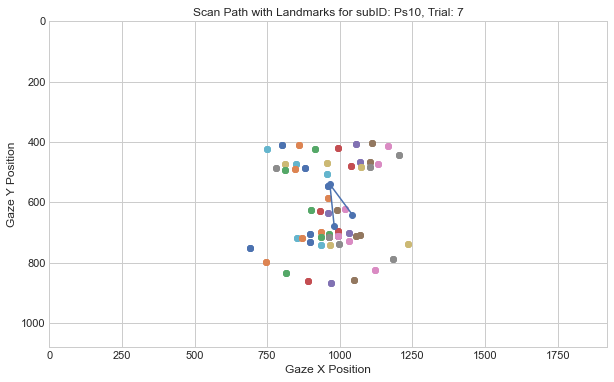

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, replace df with the actual DataFrame name

# Select data for a specific trial and subID
subID = 'Ps10'
trial_number = 7
trial_data = merged_df[(merged_df['subID'] == subID) & (merged_df['trial'] == trial_number)]

# Plot the scan path
plt.figure(figsize=(10, 6))
plt.plot(trial_data['gavx'], trial_data['gavy'], marker='o', linestyle='-', color='b')
# Scatter plot for landmark coordinates with subsampling and reduced marker size
num_landmarks = 67
subsampling_factor = 5  # Adjust as needed
exclude_ranges = [(0, 3), (13, 17)]

for i in range(num_landmarks):
    if any(start <= i <= end for start, end in exclude_ranges):
        continue  # Skip this iteration

    landmark_x_col = f'landmark_{i}_landmark_x'
    landmark_y_col = f'landmark_{i}_landmark_y'
    #print(trial_data[landmark_x_col])
    plt.scatter(
        trial_data[landmark_x_col], 
        trial_data[landmark_y_col],  # Invert y-axis
        alpha=1
    )


plt.title(f'Scan Path with Landmarks for subID: {subID}, Trial: {trial_number}')
plt.xlabel('Gaze X Position')
plt.ylabel('Gaze Y Position')
plt.xlim(left=0, right = 1920)
plt.ylim(bottom=0, top = 1080)
plt.gca().invert_yaxis()  # Invert y-axis
#plt.legend()

plt.show()


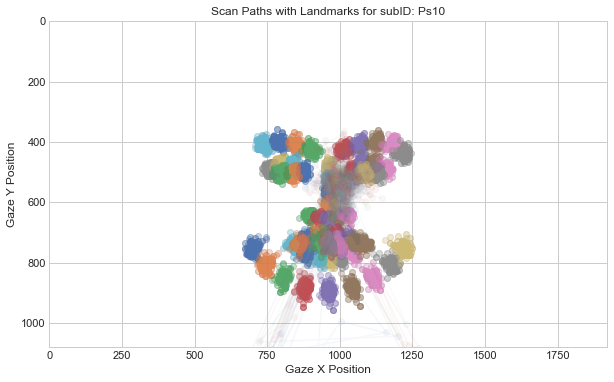

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
# If not, replace df with the actual DataFrame name

subID = 'Ps10'
all_trials_data = merged_df[merged_df['subID'] == subID]

# Plot the scan paths
plt.figure(figsize=(10, 6))
for _, trial_data in all_trials_data.groupby('trial'):
    plt.plot(trial_data['gavx'], trial_data['gavy'], marker='o', linestyle='-', alpha=0.05)

# Scatter plot for landmark coordinates with subsampling and reduced marker size
num_landmarks = 67
subsampling_factor = 5  # Adjust as needed
exclude_ranges = [(0, 3), (13, 17)]

for i in range(num_landmarks):
    if any(start <= i <= end for start, end in exclude_ranges):
        continue  # Skip this iteration

    landmark_x_col = f'landmark_{i}_landmark_x'
    landmark_y_col = f'landmark_{i}_landmark_y'
    plt.scatter(
        all_trials_data[landmark_x_col], 
        all_trials_data[landmark_y_col],  # Invert y-axis
        alpha=0.05
    )

plt.title(f'Scan Paths with Landmarks for subID: {subID}')
plt.xlabel('Gaze X Position')
plt.ylabel('Gaze Y Position')
plt.xlim(left=0, right=1920)
plt.ylim(bottom=0, top=1080)
plt.gca().invert_yaxis()  # Invert y-axis
plt.show()


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df['stim_prefix'] = merged_df['stimImgs'].str[4:6]
# Set the style for seaborn
sns.set(style="darkgrid")

# Aggregate trial data (e.g., taking mean or median)
agg_df = merged_df.groupby(['stim_prefix']).agg({
    'gavx': 'mean',  # Adjust aggregation as needed
    'gavy': 'mean',  # Adjust aggregation as needed
    'duration': 'mean',  # Adjust aggregation as needed
    # Add other columns to aggregate if necessary
}).reset_index()


In [ ]:
test = merged_df.head()

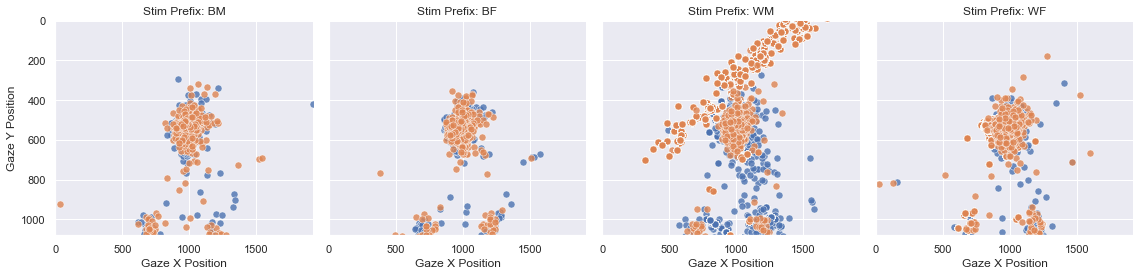

In [32]:

# Add a new column for the first three letters of stimImgs
#merged_df['stim_prefix'] = merged_df['stimImgs'].str[:3]
merged_df['stim_prefix'] = merged_df['stimImgs'].str[4:6]

# Set the style for seaborn
sns.set(style="darkgrid")

# Create a FacetGrid using seaborn
g = sns.FacetGrid(merged_df, col='stim_prefix', hue='task_ID', col_wrap=4, height=4)

# Scatter plot for scan paths using seaborn
g.map(sns.scatterplot, 'gavx', 'gavy', marker='o', s=50, alpha=0.8, edgecolors='black')

# Set titles and labels
g.set_titles("Stim Prefix: {col_name}")
g.set_axis_labels('Gaze X Position', 'Gaze Y Position')
plt.xlim(left=0, right=1920)
plt.ylim(bottom=0, top=1080)
# Adjust layout
g.tight_layout()
plt.gca().invert_yaxis() 
plt.savefig('facet_grid_plot.png', dpi=300)

# Show the plot
plt.show()


In [ ]:
# PS 14 has spiral-y odd fixation data 

# Add a new column for the first three letters of stimImgs
#merged_df['stim_prefix'] = merged_df['stimImgs'].str[:3]
merged_df['stim_prefix'] = merged_df['stimImgs'].str[4:6]
# Set the style for seaborn
sns.set(style="darkgrid")

# Plot the scan path and landmarks for each trial
plt.figure(figsize=(10, 6))
plt.title('Scan Paths with Landmarks for Each Trial')
plt.xlabel('Gaze X Position')
plt.ylabel('Gaze Y Position')
plt.xlim(left=0, right=1920)
plt.ylim(bottom=0, top=1080)
plt.gca().invert_yaxis()  # Invert y-axis

# Scatter plot for scan paths using seaborn #[merged_df.subID== "Ps14"]
sns.scatterplot(x='gavx', y='gavy', hue='task_ID', data=merged_df, marker='o', s=10, alpha=0.2, edgecolors='black')

# # Scatter plot for landmark coordinates for each trial
# num_landmarks = 67
# for i in range(num_landmarks):
#     landmark_x_col = f'landmark_{i}_landmark_x'
#     landmark_y_col = f'landmark_{i}_landmark_y'

#     # Invert y-axis directly in the scatter plot
#     sns.scatterplot(
#          x=merged_df[landmark_x_col],
#          y=-merged_df[landmark_y_col],  # Invert y-axis
#          alpha=0.05,
#          #label=f'Landmark {i}',
#          s=1
#      )

plt.legend()
plt.show()


In [ ]:
# end #

In [ ]:
# below is the recycle material #
# now I need to run the coordinates for each image # 
import cv2
import dlib
import os

# Initialize dlib's face detector
detector = dlib.get_frontal_face_detector()
face_info_list = []  # Initialize the main list

# Load the predictor
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

def round_or_zero(number):
    # Check if the number is greater than zero
    if number > 0:
        # Round the number and return it
        return round(number)
    else:
        # Return 0
        return 0

# Function to process the image
def process_image(img_path):
    # read image
    img = cv2.imread(img_path)
    # Convert image into grayscale
    gray = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)

    faces = detector(gray)   # Use detector to find faces

    for face in faces:
        x1 = face.left()  # left point
        y1 = face.top()  # top point
        x2 = face.right()  # right point
        y2 = face.bottom()  # bottom point
        x11 = round_or_zero(x1 - (x2 - x1) / 6) #round_or_zero(x1 - (x2 - x1) / 6) 
        x22 = round_or_zero(x2 + (x2 - x1) / 6) #round_or_zero(x1 - (x2 - x1) / 6)
        y11 = round_or_zero(y1 - (y2 - y1) / 6) #round_or_zero(x1 - (x2 - x1) / 6)
        y22 = round_or_zero(y2 + (y2 - y1) / 6) #round_or_zero(x1 - (x2 - x1) / 6)
        print(x11, y11, x22, y22)

        # Create a rectangle frame around the face
        cv2.rectangle(img=img, pt1=(x1, y1), pt2=(x2, y2), color=(255, 0, 250), thickness=2) #### RED here

        # Create landmark object
        landmarks = predictor(image=gray, box=face)

        x_coords = []
        y_coords = []
        coords_with_position = []
        # Loop over all the points
        for n in range(0, 68): #0, 68 ### 0-17 cene hatlari, 17-27 den sonra kas bitiyor buruna geciyor, 27-36 burun, 36-42 sol goz, 42-48 sag goz, 48-64 mouth
            x = landmarks.part(n).x
            y = landmarks.part(n).y

            # Assign color based on the value of n
            color = (int(255 * (n*2 / 68)), 255, 0) # red component will be more intense as n increases 
            coords_with_position.append((x, y, n))
            # Draw a circle
            cv2.circle(img=img, center=(x, y), radius=3, color= color, thickness=-1) #(255, 255, 0)
                # Append the coordinates to the arrays
            x_coords.append(x)
            y_coords.append(y)

        # Crop the face
        #img = img[y11:y22, x11:x22]
        
        if y2 < landmarks.part(8).y:
            y2 = landmarks.part(8).y + 5

        cv2.rectangle(img=img, pt1=(landmarks.part(1).x -5, y1), pt2=(landmarks.part(16).x + 5, y2), color=(255, 0, 0), thickness=2)   #cv2.rectangle(image, start_point, end_point, color, thickness)  #        cv2.rectangle(img=img, pt1=(x11, y11), pt2=(x22, y22), color=(0, 0, 255), thickness=2)
        print("coords_with_position:", coords_with_position)
        # Save the image with a new name


    
    base = os.path.splitext(img_path)[0]
    print(base)
    new_img_path = base + "Dotted.png"
    cv2.imwrite(new_img_path, img)
    # Store face information and landmarks in a dictionary
    # # Display image
    cv2.imshow(winname="Face", mat=img)
    # # Wait for a key press to exit
    cv2.waitKey(delay=0)
    # # Close all windows
    cv2.destroyAllWindows()

# Root directory
#root_dir = "CFD_BM"
root_dir = "test2" #test
# Walk through all folders and subfolders in the directory
for dirpath, dirs, files in os.walk(root_dir):
    print(files)
    for filename in files:
        fname = os.path.join(dirpath, filename)
        print(fname)
        if fname.endswith('.png'):
            process_image(fname)
            


# saving to a list # 

df = pd.DataFrame(face_info_list)
df['faceID'] = df['faceID'].apply(lambda x: x.split('/')[-1])

# Explode the 'landmarks' column into separate rows
df = df.explode('landmarks')

# Split the 'landmarks' column into separate columns
df[['landmark_x', 'landmark_y', 'landmark_n']] = pd.DataFrame(df['landmarks'].tolist(), index=df.index)

# Drop the original 'landmarks' column
df = df.drop('landmarks', axis=1)

# Reshape the DataFrame into long format
df_long = df.melt(id_vars=['faceID', 'landmark_n'], value_vars=['landmark_x', 'landmark_y'], var_name='coordinate_type', value_name='coordinate_value')

# Pivot the long-format DataFrame to wide format
df_wide = df_long.pivot(index=['faceID'], columns=['landmark_n', 'coordinate_type'], values='coordinate_value')

# Flatten the MultiIndex columns
df_wide.columns = [f'landmark_{n}_{coord}' for n, coord in df_wide.columns]

# Reset the index
df_wide.reset_index(inplace=True)

# Specify the CSV file path for the wide-format DataFrame
csv_file_path_wide = 'face_info_wide.csv'

# Write the wide-format DataFrame to a CSV file
df_wide.to_csv(csv_file_path_wide, index=False)

merged_df = pd.merge(df_fix, df_wide, left_on='stimImgs', right_on='faceID', how='inner') #how='inner'
csv_file_path_merged = 'merged_dataframe.csv'
merged_df.to_csv(csv_file_path_merged, index=False)

In [ ]:
merged_df.columns

In [ ]:
# let's analyze eye tracking metrics

import pandas as pd
import numpy as np

# Function to check proximity to groups
def is_close_to_group(x, y, groups, threshold=150): #threshold should take into account of the image size: 141x181
    for group in groups:
        group_x, group_y = group
        distance = np.sqrt((x - group_x)**2 + (y - group_y)**2)
        if distance < threshold:
            return True
    return False

landmarks_relative = [(-301, 125), (-125, 301), (125, 301), (301, 125)]

# Center coordinates of the new plane
center_x, center_y = 960, 540

# Normalize the landmarks
normalized_landmarks = [(landmark_x + center_x, center_y - landmark_y) for landmark_x, landmark_y in landmarks_relative]

print(normalized_landmarks)
#If the top-left corner is (0, 0), and the center is (960, 540), the correct normalization should involve subtracting the center coordinates from the group coordinates

# Calculate results for each row
dynamicfacedata['is_close_to_group'] = dynamicfacedata.apply(lambda row: is_close_to_group(row['gavx'], row['gavy'], normalized_landmarks), axis=1)
# Add a new column 'trial_duration' with the duration of each trial
dynamicfacedata['trial_duration'] = dynamicfacedata['entime'] - dynamicfacedata['sttime']
dynamicfacedata['relative_duration'] = dynamicfacedata['entime_rel'] - dynamicfacedata['sttime_rel']
# Display the DataFrame with the new 'trial_duration' column
print(dynamicfacedata[['sttime', 'entime', 'trial_duration']])
# Display the DataFrame
print(dynamicfacedata)


In [ ]:
import pandas as pd


width_plane_a, height_plane_a = 1920, 1080
width_plane_b, height_plane_b = 600, 422

# Calculate scaling factors
scale_factor_x = width_plane_a / width_plane_b
scale_factor_y = height_plane_a / height_plane_b

# Calculate center of Plane A
center_plane_a_x = 960
center_plane_a_y = 540

# Update all x-coordinate columns to be centered at (960, 540) in Plane A
landmarks_df.update(landmarks_df.filter(like='_x').multiply(scale_factor_x).add(center_plane_a_x))

# Update all y-coordinate columns to be centered at (960, 540) in Plane A
landmarks_df.update(landmarks_df.filter(like='_y').multiply(scale_factor_y).add(center_plane_a_y))

# Display the updated DataFrame
print(landmarks_df)


In [ ]:
import pandas as pd

# Define the dimensions of the coordinate planes
width_plane_a, height_plane_a = 1920, 1080
width_plane_b, height_plane_b = 600, 422

# Define the coordinates on Plane B
b_plane_coordinates = pd.DataFrame({'B_x': [600], 'B_y': [422]})

# Calculate scaling factors
scale_factor_x = width_plane_a / width_plane_b
scale_factor_y = height_plane_a / height_plane_b

# Define the left corner of Plane B
left_corner_plane_b_x = 0
top_corner_plane_b_y = 0
offset_x = left_corner_plane_b_x
offset_y = top_corner_plane_b_y

# Convert coordinates from Plane B to Plane A
b_plane_coordinates['A_x'] = (b_plane_coordinates['B_x'] * scale_factor_x) + offset_x
b_plane_coordinates['A_y'] = (b_plane_coordinates['B_y'] * scale_factor_y) + offset_y

print(b_plane_coordinates)


In [ ]:
import pandas as pd


width_plane_a, height_plane_a = 1920, 1080
width_plane_b, height_plane_b = 600, 422
point_b_x, point_b_y = 600, 422

scale_factor_x = width_plane_a / width_plane_b
scale_factor_y = height_plane_a / height_plane_b

center_plane_a_x = 960
center_plane_a_y = 540
#rescaling
offset_x = center_plane_a_x - (width_plane_b / 2)
offset_y = center_plane_a_y - (height_plane_b / 2)

# Convert coordinates from Plane B to Plane A
point_a_x = (point_b_x * scale_factor_x) + offset_x
point_a_y = (point_b_y * scale_factor_y) + offset_y

# Display the result
result_coordinates = pd.DataFrame({'B_x': [point_b_x], 'B_y': [point_b_y], 'A_x': [point_a_x], 'A_y': [point_a_y]})
print(result_coordinates)


In [ ]:
from PIL import Image, ImageDraw

# Load the existing image
dir_path = os.getcwd()
happy_face = dir_path +  "/neutral_7373_happy.png"
existing_image = Image.open(happy_face)

# Get pixel information
pixels = list(existing_image.getdata())

# Create a new blank image with the same dimensions as the existing image
width, height = existing_image.size
new_image = Image.new("RGB", (width, height), "white")
draw = ImageDraw.Draw(new_image)

# Draw the pixels on the new image
for y in range(height):
    for x in range(width):
        draw.point((x, y), fill=pixels[y * width + x])

# Save the new image
new_image.save("recreated_image.png")

# Display the new image
new_image.show()


In [ ]:
# row version below:
# saved just read/skip this block
""" variable_values_dict = df_variables.set_index(['trial', 'subID', 'variable'])['value'].to_dict()
for index, row in df_fix.iterrows():
    key = (row['trial'], row['subID'])
    for variable in df_variables['variable'].unique():
        df_fix.at[index, variable] = variable_values_dict.get((row['trial'], row['subID'], variable), None)
# Print the updated df_fix dataframe
print(df_fix.head())
df_fix.to_csv("genderRaceEyeTrackFinalDF.csv") """